In [7]:
# shapley additive explanations

In [ ]:
import shap
import numpy as np
from sklearn.datasets import load_diabetes # feita a troca para a database de diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [9]:
data = load_diabetes() # load do modelo

In [10]:
x, y = data['data'], data['target'] # data são os parametros e target são as classes (0, 1 ou 2)

In [11]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
data['feature_names'] # nome das colunas

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # separa entre teste e treinamento

In [14]:
clf = LinearSVC() # linear support vector class
clf.fit(x_train, y_train) # fitting do modelo

LinearSVC()

In [15]:
clf.score(x_test, y_test) # score do modelo

0.0

In [16]:
clf.predict([x_test[0]])

array([72.])

In [17]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(x_train, 10)) # explica o modelo

In [18]:
shap_values = explainer.shap_values(x_test) # valores de shapley

100%|██████████| 89/89 [00:04<00:00, 18.00it/s]


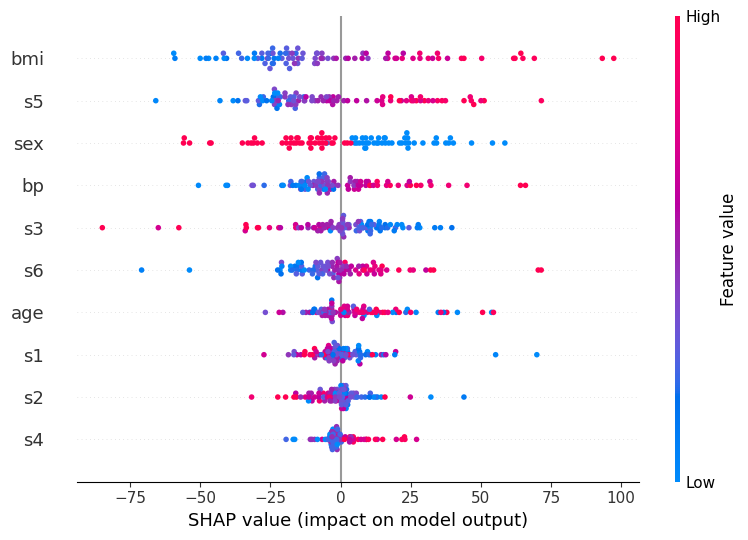

In [19]:
shap.summary_plot(shap_values, x_test, feature_names=data['feature_names']) # plot dos valores de shapley

In [20]:
shap.initjs() # precisa do js pra poder plotar
shap.force_plot(explainer.expected_value, shap_values[2], x_test[2], feature_names=data['feature_names'])

In [21]:
mean_absolute_shap_values = np.abs(shap_values).mean(axis=0)  # média dos valores de shapley
mean_absolute_shap_values

array([11.76283587, 19.41365906, 27.30096505, 14.5390838 ,  7.52553985,
        6.81125537, 14.2058    ,  5.19802387, 22.07052789, 12.43677857])

In [22]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_absolute_shap_values)

In [23]:
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True) # ordena

In [24]:
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

bmi: 27.3009650522844
s5: 22.070527886277336
sex: 19.413659056794128
bp: 14.539083796508907
s3: 14.205800001616767
s6: 12.436778566451997
age: 11.762835874925662
s1: 7.525539845225845
s2: 6.811255368769615
s4: 5.198023868383863
